*Import the packages.*

For data and computation import pandas and numpy.

For visualization import matplotlib.pylot and seaborn.

In [2]:
#Data & Computation
import pandas as pd
import numpy as np

In [3]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sb

*Loading the dataset*

Load the dataset using read_csv function and set the display to show the max no.of columns.

In [4]:
#Display option (Show all columns/data)
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('C:\Work\DA\superstore-sales-eda\data\superstore.csv')
print(df.head())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969   

  Order.Priority       Product.ID  \
0           High  OFF-PA-10002005   
1         Medium  OFF-PA-10002893   

*Check the size of data*

Using the shape func. we can check the number of rows, columns in the dataset and info shows us the data type and null counts.

In [6]:
#Shape of the dataset
print('Dataset shape:', df.shape)
df.info()

Dataset shape: (51290, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sale

*Checking for missing values*

Using the isnull func. checking which there are any null values.

In [7]:
#Check missing values
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

*Getting the summary stats for the columns*

Using the describe function we get the summary stats like count, mean, std, min, max, etc. for the columns.

In [8]:
#Summary stats for numerical columns
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


*Checking for unique value per column*

using the nunique func. we get the unique value in all the columns.

In [9]:
#Check unique value per column
df.nunique()

Category              3
City               3636
Country             147
Customer.ID        4873
Customer.Name       795
Discount             27
Market                7
记录数                   1
Order.Date         1430
Order.ID          25035
Order.Priority        4
Product.ID        10292
Product.Name       3788
Profit            24575
Quantity             14
Region               13
Row.ID            51290
Sales              2246
Segment               3
Ship.Date          1464
Ship.Mode             4
Shipping.Cost     16877
State              1094
Sub.Category         17
Year                  4
Market2               6
weeknum              53
dtype: int64

*Coverting date format to useable object in pandas*

In [10]:
# Convert Ship Date and Order Date to datetime
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])
df['Order.Date'] = pd.to_datetime(df['Order.Date'])

In [11]:
df[['Ship.Date', 'Order.Date']].dtypes

Ship.Date     datetime64[ns]
Order.Date    datetime64[ns]
dtype: object

*Dropping columns*

Dropping columns which are not needed using the .drop function.

In [12]:
# Dropping unnecessary columns, drop 'Postal Code' as it is not important to this analysis
df.drop('记录数', axis=1, inplace=True)

In [13]:
#Checking no.of columns
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [14]:
#Checking for duplicates
print('Duplicates:', df.duplicated().sum())

Duplicates: 0


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(51290, 26)

*Renaming the columns using the replace function*

In [17]:
#Remaning columns
df.columns = df.columns.str.strip().str.replace('.','_')

In [18]:
df.columns

Index(['Category', 'City', 'Country', 'Customer_ID', 'Customer_Name',
       'Discount', 'Market', 'Order_Date', 'Order_ID', 'Order_Priority',
       'Product_ID', 'Product_Name', 'Profit', 'Quantity', 'Region', 'Row_ID',
       'Sales', 'Segment', 'Ship_Date', 'Ship_Mode', 'Shipping_Cost', 'State',
       'Sub_Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

*Using filter for checking weird or negative values*

In [19]:
#Checking weird or negative values
df[df['Profit'] < 0].head()

,Category,City,Country,Customer_ID,Customer_Name,Discount,Market,Order_Date,Order_ID,Order_Priority,Product_ID,Product_Name,Profit,Quantity,Region,Row_ID,Sales,Segment,Ship_Date,Ship_Mode,Shipping_Cost,State,Sub_Category,Year,Market2,weeknum
29009,Technology,Paris,France,RC-198252,Roy Collins,0.15,EU,2011-04-26,IT-2011-2185983,Critical,TEC-PH-10000070,"Nokia Headset, with Caller ID",-24.2715,11,Central,14643,684,Consumer,2011-04-27,Same Day,100.32,Ile-de-France,Phones,2011,EU,18
29012,Technology,Taverny,France,TB-211752,Thomas Boland,0.15,EU,2011-08-26,ES-2011-5235241,High,TEC-CO-10004034,"Canon Fax Machine, High-Speed",-19.0170,2,Central,10342,538,Corporate,2011-08-27,Same Day,70.11,Ile-de-France,Copiers,2011,EU,35
29018,Technology,Tremblay-en-France,France,DH-130752,Dave Hallsten,0.15,EU,2011-12-02,ES-2011-4614329,High,TEC-MA-10000261,"StarTech Calculator, Red",-0.0495,3,Central,14661,95,Corporate,2011-12-04,First Class,5.53,Ile-de-France,Machines,2011,EU,49
29021,Technology,Guyancourt,France,MH-174552,Mark Hamilton,0.15,EU,2012-06-07,ES-2012-2141914,High,TEC-PH-10002076,"Samsung Audio Dock, Full Size",-6.7560,2,Central,13807,286,Consumer,2012-06-11,Second Class,60.78,Ile-de-France,Phones,2012,EU,23
29024,Technology,Le Plessis-Robinson,France,AA-104802,Andrew Allen,0.15,EU,2012-08-30,IT-2012-5602177,Medium,TEC-CO-10002157,"Canon Fax Machine, Laser",-111.4995,7,Central,11169,1894,Consumer,2012-09-02,Second Class,111.55,Ile-de-France,Copiers,2012,EU,35


In [20]:
#Check for extremely high discounts
df['Discount'].value_counts().sort_index()

Discount
0.000    29009
0.002      461
0.070      150
0.100     4068
0.150      541
0.170      735
0.200     4998
0.202       41
0.250      198
0.270      388
0.300      340
0.320       27
0.350      122
0.370       74
0.400     3177
0.402      104
0.450      327
0.470      725
0.500     1633
0.550       10
0.570       12
0.600     2006
0.602       23
0.650       17
0.700     1786
0.800      316
0.850        2
Name: count, dtype: int64

*Using the groupby function to get the top 10 profitable sub-categories*

In [21]:
#Getting the top 10 profitable sub-categories
top_profit = df.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(10)

In [22]:
print(top_profit)

Sub_Category
Copiers        258567.54818
Phones         216717.00580
Bookcases      161924.41950
Appliances     141680.58940
Chairs         140396.26750
Accessories    129626.30620
Storage        108461.48980
Binders         72449.84600
Paper           59207.68270
Machines        58867.87300
Name: Profit, dtype: float64


*Plotting a horizontal bar chart*

*Insight:* Copiers, Phones, and Bookcases are the most profitable sub-categories. In contrast, Paper and Machines generate the least profit.

*Recommendation:* Explore scaling sales of top-performing items and re-evaluate pricing, sourcing, or discounting strategies for lower-performing sub-categories.

C:\Users\prati\AppData\Local\Temp\ipykernel_18864\2890734572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_profit.values,y=top_profit.index, palette='viridis')


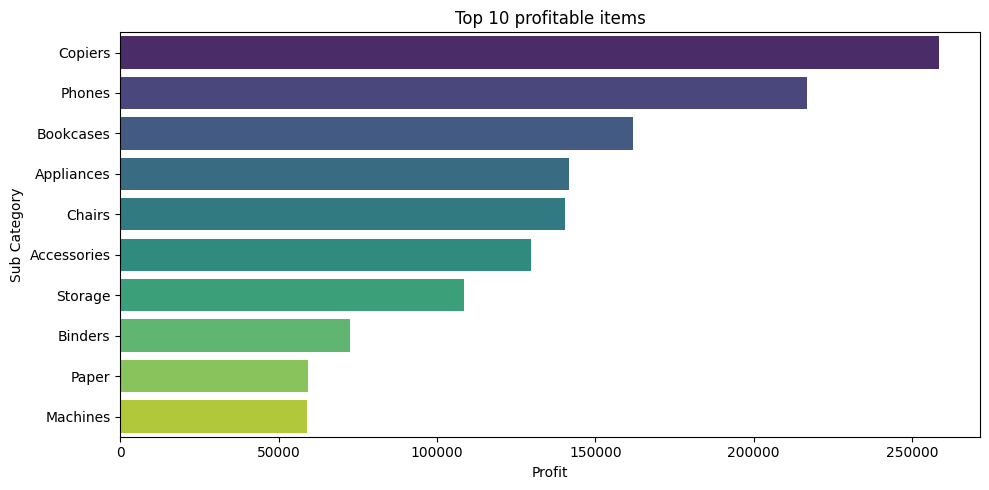

In [23]:
#Plotting the chart
plt.figure(figsize=(10,5))
sb.barplot(x=top_profit.values,y=top_profit.index, palette='viridis')
plt.title('Top 10 profitable items')
plt.xlabel('Profit')
plt.ylabel('Sub Category')
plt.tight_layout()
plt.show()

In [24]:
#Sales & Profit by Region
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

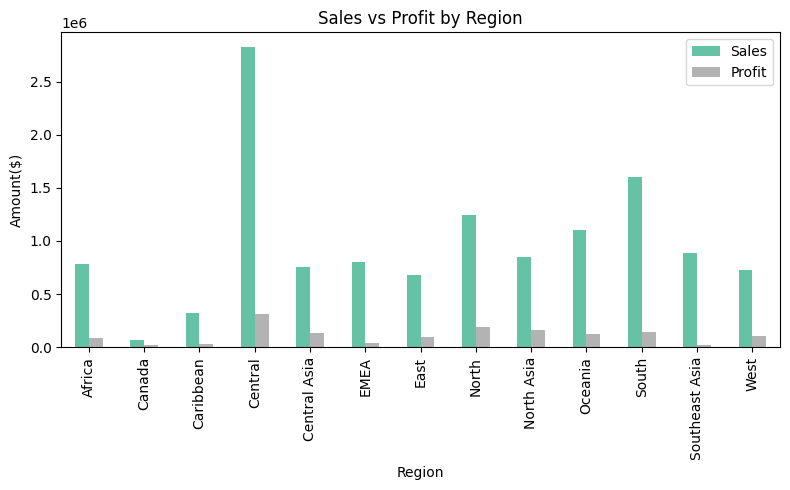

In [25]:
#Visualizing the data
plt.Figure(figsize=(8,5))
region_summary.plot(x='Region', kind='bar', stacked=False, figsize=(8,5), colormap='Set2')
plt.title('Sales vs Profit by Region')
plt.ylabel('Amount($)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

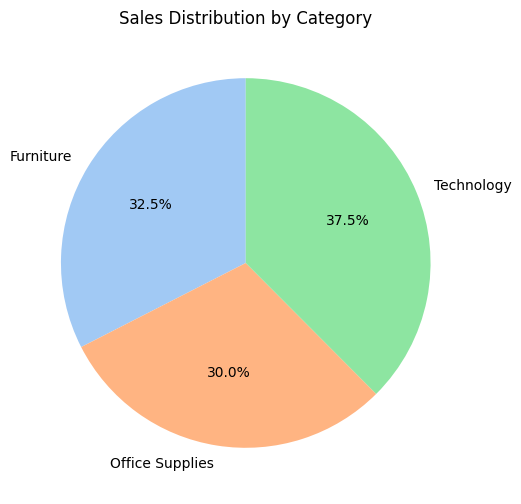

In [26]:
#Category-Wise Sales
plt.figure(figsize=(6,6))
df.groupby('Category')['Sales'].sum().plot.pie(autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'))
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

*Insight:* Discounts below 20% maintain positive profitability. Beyond 40%, most transactions result in losses across all categories.

*Recommendation:* Limit deep discounting unless strategically justified. Focus discounts under 20%, especially for Office Supplies, which have weaker profit resilience.

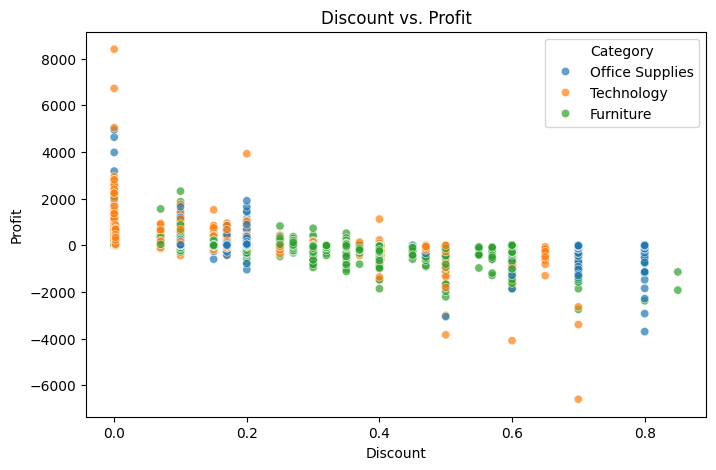

In [27]:
#Discount vs Profit Relationship
plt.figure(figsize=(8,5))
sb.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Discount vs. Profit')
plt.show()

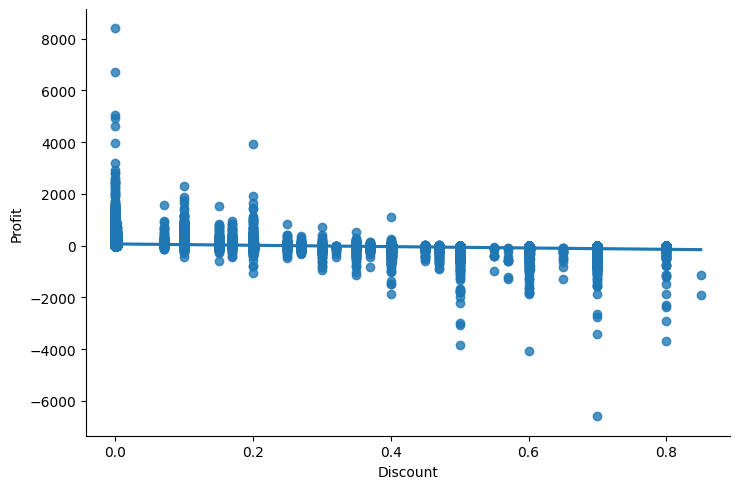

In [28]:
sb.lmplot(data=df, x='Discount', y='Profit', height=5, aspect=1.5)

In [29]:
#Monthly Sales Trend
df['Month'] = df["Order_Date"].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

*Insight:* Sales spike consistently during Q4 (Oct–Dec), with sharp drops in January — likely due to holiday seasonality.

*Recommendation:* Increase marketing spend and inventory allocation in Q4 to maximize revenue. Adjust staffing and logistics post-holiday season to offset slowdowns

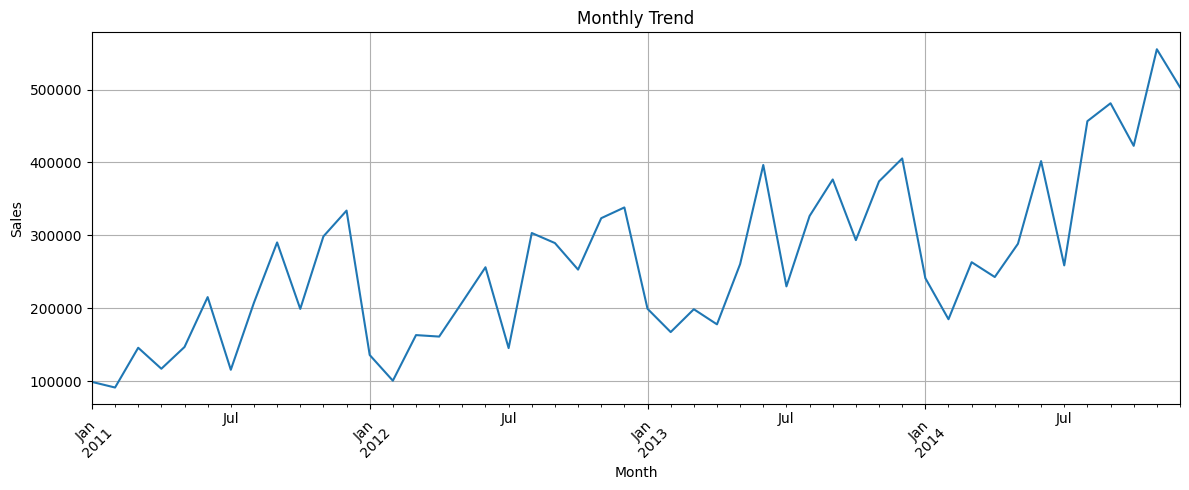

In [30]:
plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title('Monthly Trend')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)
pd.set_option('display.max_columns', None)

In [38]:
print(sales_by_country)

Country
United States    2297354
Australia         925257
France            858930
China             700591
Germany           628857
Name: Sales, dtype: int64


*Insight:* The United States significantly outperforms other countries in both sales and profit. Germany contributes the least.

*Recommendation:* Focus growth efforts in top-performing markets like the US, while conducting market analysis in underperforming regions to identify barriers or opportunities.

C:\Users\prati\AppData\Local\Temp\ipykernel_18864\3430700532.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='muted')


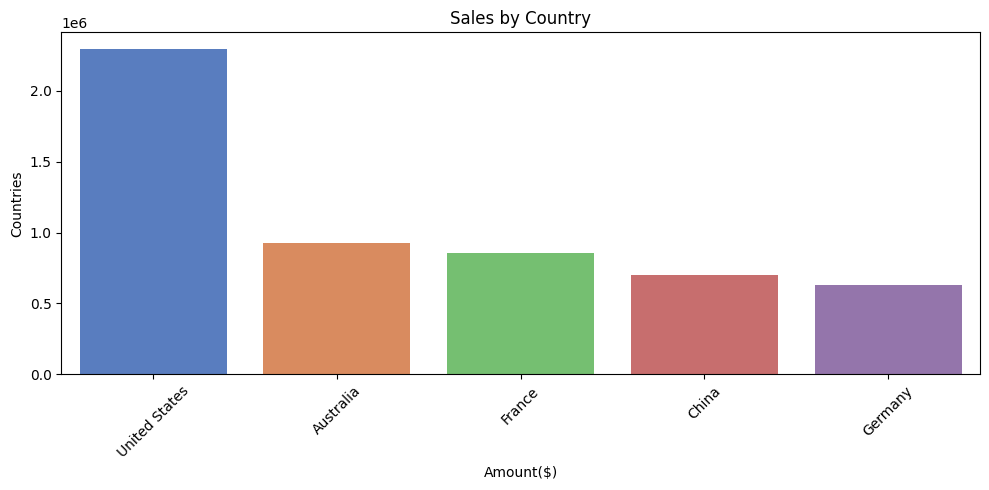

In [39]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

plt.figure(figsize=(10,5))
sb.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='muted')
plt.title('Sales by Country')
plt.xlabel('Amount($)')
plt.ylabel('Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()